Objective:

Our goal was to analyze eBay listing data and determine which factors influence pricing and potential sales trends.

Key Findings:

1️⃣ Seller Rating vs. Price:
No significant correlation between seller rating and price (p = 0.089).
Higher-rated sellers do not necessarily charge more.

2️⃣ Condition Matters:
New items are priced ~$298 higher than other conditions.
Condition is the most important price driver.

3️⃣ Seasonal Impact:
No significant difference between Winter & Spring prices (p = 0.521).
Lack of Summer & Fall data prevents full seasonality analysis.

4️⃣ Time Trend (Price Evolution Over Time):
Prices increase slightly by ~$1.61 per day.
However, the effect is statistically insignificant (R² = 0.003).

5️⃣ Regression Model (Factors Affecting Price):
Condition: Strongest impact (+$298 for "New").
Seller Rating: Weak negative effect (higher-rated sellers slightly lower prices).
Coupons & Adult Only status had no effect.

Future Considerations for Sales Prediction:

🔹 Need actual sales data (number of items sold per listing) for accurate forecasting.

🔹 Consider external factors (market demand, competitor pricing, holiday effects).

🔹 If more seasonal data is available, re-run the analysis to validate trends across all seasons.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [2]:
# Load dataset
df = pd.read_csv("ebay_cleaned.csv")

In [3]:
# Convert date column
df["Item Creation Date"] = pd.to_datetime(df["Item Creation Date"], errors="coerce")

In [4]:
# Encode categorical variables
label_encoders = {}
for col in ["Condition", "Available Coupons", "Adult Only"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
# Basic Statistics
print("Numerical Summary:\n", df.describe())
print("Categorical Summary:\n", df.describe(include=["object", "bool"]))

Numerical Summary:
         Category IDs        Price  Condition  Seller Rating  Shipping Cost  \
count      82.000000    82.000000  82.000000      82.000000           82.0   
mean   106391.256098   437.426341   0.036585     555.158537            0.0   
std     22550.712627   201.254173   0.188897     221.602551            0.0   
min       177.000000     5.000000   0.000000       1.000000            0.0   
25%    111422.000000   500.000000   0.000000     500.000000            0.0   
50%    111422.000000   500.000000   0.000000     500.000000            0.0   
75%    111422.000000   500.000000   0.000000     500.000000            0.0   
max    111422.000000  1029.000000   1.000000    1000.000000            0.0   

       Adult Only  Available Coupons  
count        82.0               82.0  
mean          0.0                0.0  
std           0.0                0.0  
min           0.0                0.0  
25%           0.0                0.0  
50%           0.0                0.0  
75% 

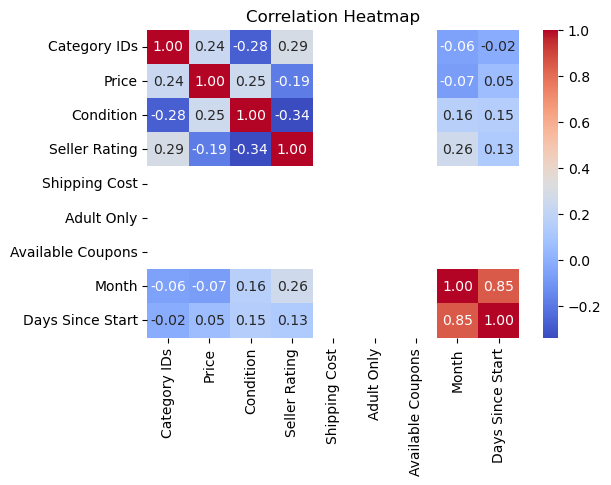

In [17]:
# Correlation Analysis
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

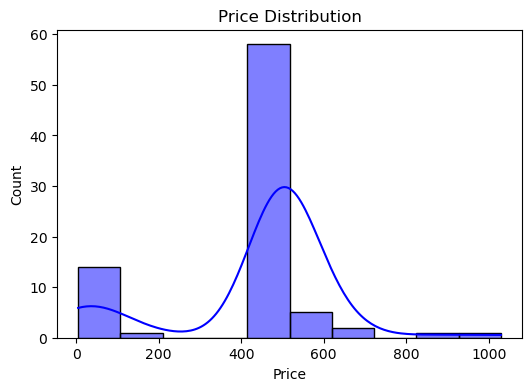

In [9]:
# Price Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["Price"], bins=10, kde=True, color="blue")
plt.title("Price Distribution")
plt.show()

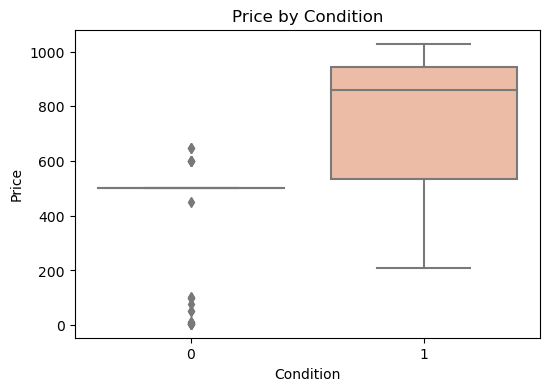

In [10]:
# Price vs. Condition Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Condition"], y=df["Price"], palette="coolwarm")
plt.title("Price by Condition")
plt.show()

In [11]:
# Hypothesis Testing: Seller Rating vs. Price
corr_coeff, p_value_corr = pearsonr(df["Seller Rating"], df["Price"])
print(f"Pearson Correlation: {corr_coeff}, p-value: {p_value_corr}")

Pearson Correlation: -0.1891327383055034, p-value: 0.08879788995238272


In [12]:
high_rated = df[df["Seller Rating"] >= 500]["Price"]
low_rated = df[df["Seller Rating"] < 500]["Price"]
t_stat, p_value_ttest = ttest_ind(high_rated, low_rated, equal_var=False)
print(f"T-test: {t_stat}, p-value: {p_value_ttest}")

T-test: -0.2970210960233212, p-value: 0.7855986132653694


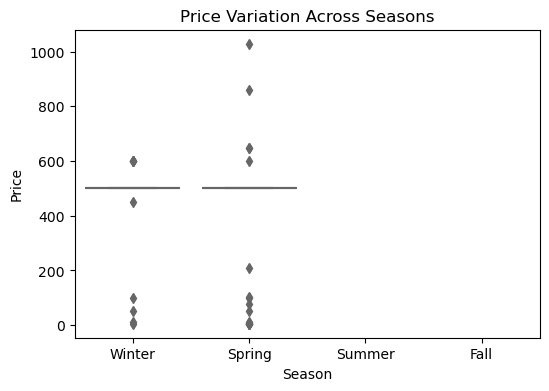

In [13]:
# Seasonal Analysis
df["Month"] = df["Item Creation Date"].dt.month
season_map = {12: "Winter", 1: "Winter", 2: "Winter", 3: "Spring", 4: "Spring", 5: "Spring",
              6: "Summer", 7: "Summer", 8: "Summer", 9: "Fall", 10: "Fall", 11: "Fall"}
df["Season"] = df["Month"].map(season_map)

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Season"], y=df["Price"], order=["Winter", "Spring", "Summer", "Fall"], palette="coolwarm")
plt.title("Price Variation Across Seasons")
plt.show()

In [14]:
# ANOVA Test for Seasonal Effects
winter_prices = df[df["Season"] == "Winter"]["Price"]
spring_prices = df[df["Season"] == "Spring"]["Price"]
anova_stat, p_value_anova = f_oneway(winter_prices, spring_prices)
print(f"ANOVA Test: {anova_stat}, p-value: {p_value_anova}")

ANOVA Test: 0.4154084593591077, p-value: 0.521080924644278


In [15]:
# Regression Model: Factors Affecting Price
X = df[["Seller Rating", "Condition", "Category IDs", "Available Coupons", "Adult Only"]]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Regression R²: {r2}")
print(f"Feature Coefficients: {dict(zip(X.columns, model.coef_))}")

Regression R²: 0.1383047467171925
Feature Coefficients: {'Seller Rating': -0.13795333808721705, 'Condition': 298.0684740638413, 'Category IDs': 0.0028086677044002993, 'Available Coupons': 0.0, 'Adult Only': 0.0}


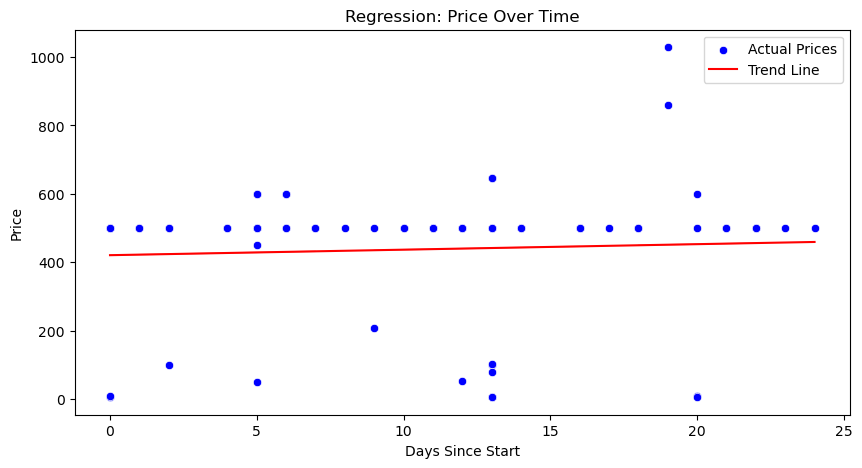

Time Trend R²: 0.002934669986633498


In [16]:
# Price Trend Over Time
df["Days Since Start"] = (df["Item Creation Date"] - df["Item Creation Date"].min()).dt.days
X_time = df[["Days Since Start"]]
y_time = df["Price"]
time_model = LinearRegression()
time_model.fit(X_time, y_time)
y_time_pred = time_model.predict(X_time)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Days Since Start"], y=df["Price"], color="blue", label="Actual Prices")
sns.lineplot(x=df["Days Since Start"], y=y_time_pred, color="red", label="Trend Line")
plt.title("Regression: Price Over Time")
plt.show()
print(f"Time Trend R²: {r2_score(y_time, y_time_pred)}")